**Initial data:**

alfa = 0.5 - infectioning coef

beta = 0.3 - recovering coef

N = 1000000   - all sample of people

S(0)=990000 - initial value for S

I(0)=7000 - initial value for I

R(0)=3000 - initial value for R

t0, tf =  from 0 to 25 days - timeframe

S(t)          -  sample of peaple who have good condition, but could be infected

I(t)          - sample of peaple who are already infected (they are cariess of desise

R(t)          - sample of peaple who have good condition and can`t be effected by desise


**Constrains:**

S(t)+I(t)+R(t) = N

dS/dt = -alfa*S

dI/dt = alfa*S-beta*I

dR/dt = beta*I


**Task: **
1. Solve equation: dS/dt = -alfa*S and plotting function S(t)

2. Solve equation: dI/dt = alfa*S-beta*I and plotting function I(t)

3. Solve equation: dR/dt = beta*I by using equation: S(t)+I(t)+R(t) = N and results of  dS/dt = -alfa*S and dI/dt = alfa*S-beta*I and ploting function R(t) with scipy.interpolate.interp1d.

4. Show 3 plots: S(t),I(t),R(t) on one picture





In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters

In [ ]:
alfa = 0.5  # infection coef
beta = 0.3  # recovering coef
N = 1000000  # total population
S0 = 990000  # initial susceptible population
I0 = 7000  # initial infected population
R0 = 3000  # initial recovered population
t0, tf = 0, 25  # time frame

In [ ]:
def total(t,y):
    S = -alfa*y[0]
    I = alfa*y[0] - beta*y[1]
  
    return S, I

In [ ]:
sol = solve_ivp(total, [t0, tf], [S0, I0], t_eval=np.linspace(t0, tf, 1000))

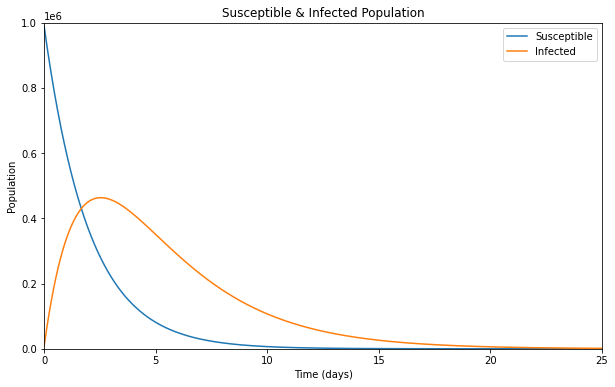

In [ ]:
# Plot R(t)
plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')

plt.xlim(0, 25)
plt.ylim(0, 1000000)
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Susceptible & Infected Population')
plt.legend()
plt.show()

using the solve_ivp function to solve the differential equation and interpolate the results

In [ ]:
from scipy.interpolate import interp1d
S = sol.y[0]
I = sol.y[1]
R = interp1d(sol.t, N - S - I, kind='cubic')

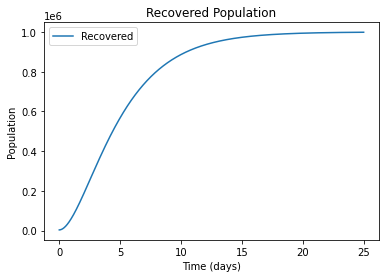

In [ ]:
# Plot R(t)

plt.plot(sol.t, R.y, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Recovered Population')
plt.legend()
plt.show()

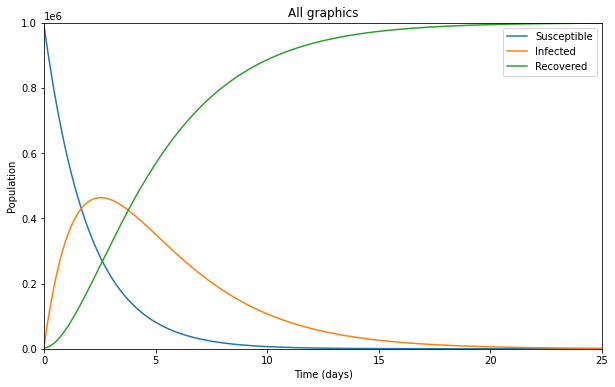

In [ ]:
# Plot R(t)
plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')
plt.plot(sol.t, R.y, label='Recovered')
plt.xlim(0, 25)
plt.ylim(0, 1000000)
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('All graphics')
plt.legend()
plt.show()